In [50]:
import rioxarray
import geopandas
import leafmap
import geoplot
import geoplot.crs as gcrs
import shapely
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

In [2]:
aoi_dir = "data/aoi.geojson"
points = "data/measurements/shp_GA_5513_1739_2022/GA_5513_1739_2022_punkty_czynne_i_archiwalne_m_ilosc_i_bad.shp"

Prepare area of interest

In [3]:
geodf = geopandas.read_file(aoi_dir)

In [4]:
geodf.head()

,FID,geometry
0,0,"POLYGON ((19.17300 51.17912, 19.17346 51.17910..."


In [5]:
geodf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Prepare shp file with measurement points
Points are in epsg2180 crs.

In [6]:
df = geopandas.read_file(points)

In [7]:
df = df.set_crs("EPSG:2180")

In [8]:
df.crs

<Derived Projected CRS: EPSG:2180>
Name: ETRF2000-PL / CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - onshore and offshore.
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: ETRF2000 Poland
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
df = df.to_crs("EPSG:4326")

In [10]:
df['geometry'].head(1)

0    MULTIPOINT (19.17842 50.72782)
Name: geometry, dtype: geometry

In [11]:
df['geometry'] = df['geometry'].explode(index_parts=False)

In [12]:
df.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))

0     POINT (50.72782 19.17842)
1     POINT (50.85889 18.87222)
2     POINT (50.81599 19.08174)
3     POINT (50.83717 18.92135)
4     POINT (50.75044 19.50739)
                ...            
72    POINT (51.15053 19.13450)
73    POINT (51.09886 19.17081)
74    POINT (51.08769 19.13447)
75    POINT (51.08769 19.13456)
76    POINT (51.10439 19.16253)
Name: geometry, Length: 77, dtype: geometry

In [13]:
df.head(15)

,ID,NR_M_ILOSC,RZAD,NR_OTW_W_S,CZYNNY,ROK_ZAKONC,NR_M_BADAW,WOJ_NAZWA,POW_NAZWA,GM_NAZWA,M_NAZWA,GMRotation,geometry
0,161,126.0,II,1.0,0,1989-01-01,None,l¹skie,bielski,Buczkowice,Zawodzie,0.000000e+00,POINT (19.17842 50.72782)
1,395,472.0,II,1.0,0,2016-01-01,None,l¹skie,k³obucki,Wrêczyca Wielka,Golce,5.336085e-07,POINT (18.87222 50.85889)
2,396,473.0,II,1.0,0,1987-01-01,None,l¹skie,m. Czêstochowa,M. Czêstochowa,Czêstochowa,0.000000e+00,POINT (19.08174 50.81599)
3,411,479.0,II,1.0,0,1986-01-01,None,l¹skie,k³obucki,Wrêczyca Wielka,Wrêczyca,0.000000e+00,POINT (18.92135 50.83717)
4,831,921.0,II,1.0,0,1999-01-01,None,l¹skie,czêstochowski,Przyrów,Sygontka,0.000000e+00,POINT (19.50739 50.75044)
5,832,922.0,II,1.0,0,2013-01-01,None,l¹skie,czêstochowski,Janów,Z³oty Potok,3.600000e+02,POINT (19.41315 50.68703)
6,833,923.0,II,1.0,0,1999-01-01,None,l¹skie,czêstochowski,Janów,Z³oty Potok,0.000000e+00,POINT (19.44182 50.72098)
7,834,924.0,II,1.0,1,None,None,l¹skie,czêstochowski,Janów,Z³oty Potok,0.000000e+00,POINT (19.41204 50.68556)
8,842,928.0,II,1.0,0,1999-01-01,None,l¹skie,czêstochowski,Przyrów,Sygontka,3.600000e+02,POINT (19.47393 50.75678)
9,843,929.0,II,1.0,0,1996-01-01,None,l¹skie,czêstochowski,Przyrów,Julianka,0.000000e+00,POINT (19.50739 50.75044)


<GeoAxesSubplot: >

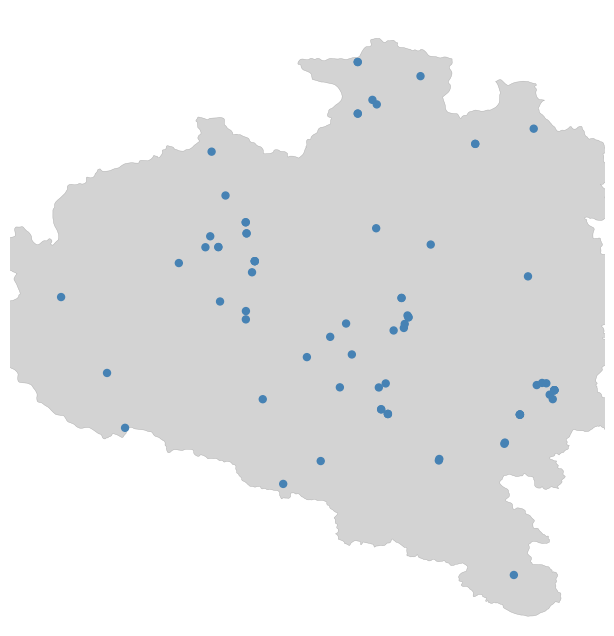

In [14]:
ax = geoplot.polyplot(geodf, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))
geoplot.pointplot(df, ax=ax)
#geoplot.show()

<AxesSubplot: >

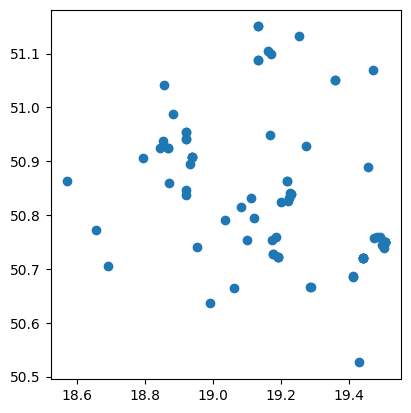

In [15]:
df.plot()

In [67]:
excel_data_dirs = ["data/measurements/GA_5513_1739_2022_monitoring_st_ilosciowego_pomiary_manualne.xls", "data/measurements/GA_5513_1739_2022_monitoring_st_ilosciowego_pomiary_automatyczne.xls"]
excel_data_geojson_dirs = ["data/measurements/GA_5513_1739_2022_quantitative_status_monitoring_manual.json", "data/measurements/GA_5513_1739_2022_quantitative_status_monitoring_automatic.json"]
excel_data = pd.read_excel(excel_data_dirs[0])

In [18]:
excel_data.columns = excel_data.iloc[0]
excel_data = excel_data.drop(excel_data.index[0])

In [19]:
excel_data.reset_index(inplace=True)
excel_data.drop("index", inplace=True, axis=1)

In [20]:
excel_data["Data/Punkty"] = pd.to_datetime(excel_data["Data/Punkty"], format='%Y-%m-%d %H:%M:%S')

In [58]:
excel_data[excel_data.loc[:, excel_data.columns != "Data/Punkty"].columns] = excel_data[excel_data.loc[:, excel_data.columns != "Data/Punkty"].columns].astype('float64')

In [17]:
excel_data = excel_data.drop(excel_data.index[0])

In [59]:
excel_data.head()

1,Data/Punkty,II/112/1,II/113/1,II/114/1,II/115/1,II/116/1,II/131/1,II/132/1,II/292/1,II/297/1,...,II/936/1,II/940/1,II/949/1,II/951/1,II/952/1,II/957/1,II/1345/1,II/1346/1,II/1351/1,II/1352/1
0,2001-11-05,9.65,31.96,29.35,10.58,8.25,16.86,48.15,12.07,5.1,...,0.17,42.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-11-12,9.66,31.91,29.44,10.57,8.19,16.96,48.25,12.05,5.2,...,0.16,42.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-11-19,9.66,31.86,29.30,10.55,8.11,16.91,48.20,12.08,5.2,...,0.20,42.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-11-26,9.63,31.80,29.44,10.54,8.03,16.86,48.25,12.07,5.0,...,0.19,42.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-12-03,9.67,31.83,29.52,10.53,8.08,16.91,48.30,12.08,5.0,...,0.18,42.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
excel_2020 = excel_data[excel_data["Data/Punkty"].dt.year.eq(2018)]

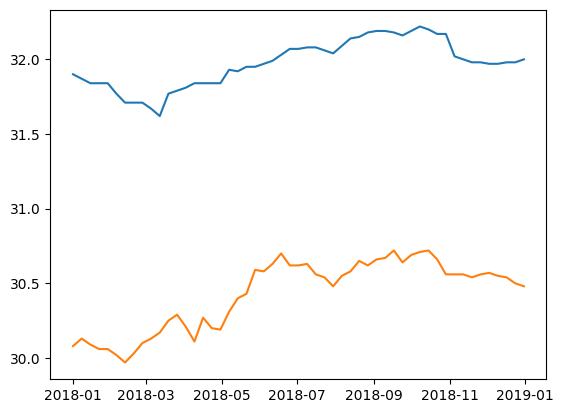

In [48]:
plt.plot(excel_2020["Data/Punkty"], excel_2020["II/113/1"], label="II/113/1")
plt.plot(excel_2020["Data/Punkty"], excel_2020["II/114/1"], label="II/114/1")

In [40]:
corr = excel_data.corr()

<AxesSubplot: xlabel='1', ylabel='1'>

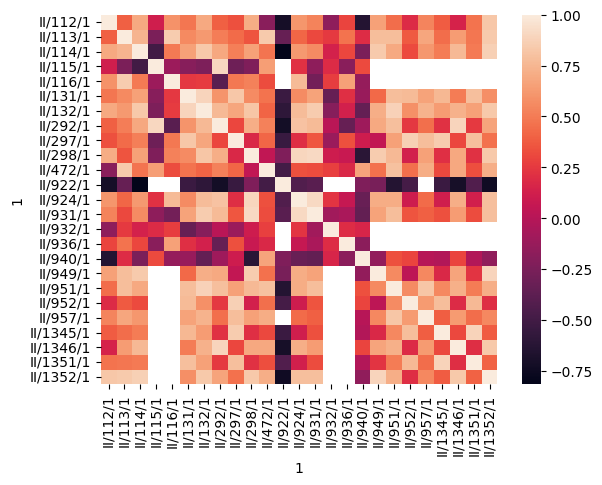

In [26]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [27]:
excel_data_melted = excel_data.melt(id_vars=["Data/Punkty"],
                             var_name="name",
                             value_name="value")

In [28]:
excel_data_melted

,Data/Punkty,name,value
0,2001-11-05,II/112/1,9.65
1,2001-11-12,II/112/1,9.66
2,2001-11-19,II/112/1,9.66
3,2001-11-26,II/112/1,9.63
4,2001-12-03,II/112/1,9.67
...,...,...,...
27395,2022-10-03,II/1352/1,15.67
27396,2022-10-10,II/1352/1,15.66
27397,2022-10-17,II/1352/1,15.69
27398,2022-10-24,II/1352/1,15.70


In [64]:
points_data_dir = "data/measurements/GA_5513_1739_2022_dane_o_punktach_czynnych_i_archiwalnych.xls"

In [65]:
points_data = pd.read_excel(points_data_dir)

In [30]:
points_data = points_data[["Numer punktu monitoringu stanu ilościowego", "Współrzędne PUWG 1992 X", "Współrzędne PUWG 1992 Y"]]

In [31]:
points_data = points_data.rename(columns = {"Numer punktu monitoringu stanu ilościowego": "name", "Współrzędne PUWG 1992 X": "longitude", "Współrzędne PUWG 1992 Y": "latitude"}) 

In [32]:
data_merged = pd.merge(excel_data_melted, points_data, on="name")

In [33]:
gdf = geopandas.GeoDataFrame(data_merged, geometry=geopandas.points_from_xy(data_merged.longitude, data_merged.latitude))

In [34]:
gdf = gdf.set_crs("EPSG:2180")

In [35]:
gdf.crs

<Derived Projected CRS: EPSG:2180>
Name: ETRF2000-PL / CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - onshore and offshore.
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: ETRF2000 Poland
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [36]:
gdf = gdf.to_crs("EPSG:4326")

In [37]:
gdf = gdf.drop(["longitude", "latitude"], axis=1)

In [38]:
gdf

,Data/Punkty,name,value,geometry
0,2001-11-05,II/112/1,9.65,POINT (18.85332 50.93821)
1,2001-11-12,II/112/1,9.66,POINT (18.85332 50.93821)
2,2001-11-19,II/112/1,9.66,POINT (18.85332 50.93821)
3,2001-11-26,II/112/1,9.63,POINT (18.85332 50.93821)
4,2001-12-03,II/112/1,9.67,POINT (18.85332 50.93821)
...,...,...,...,...
27395,2022-10-03,II/1352/1,15.67,POINT (18.95362 50.74014)
27396,2022-10-10,II/1352/1,15.66,POINT (18.95362 50.74014)
27397,2022-10-17,II/1352/1,15.69,POINT (18.95362 50.74014)
27398,2022-10-24,II/1352/1,15.70,POINT (18.95362 50.74014)


In [51]:
file = h5py.File("data/gpm-imerg/3B-MO.MS.MRG.3IMERG.20210101-S000000-E235959.01.V06B.HDF5", "r")

In [54]:
list(file.keys())

['Grid']

In [55]:
gdf.describe()

,value
count,19133.000000
mean,18.571713
std,14.436682
min,-0.100000
25%,5.780000
50%,14.500000
75%,31.370000
max,50.300000


In [56]:
gdf.isna().sum()

Data/Punkty       0
name              0
value          8267
geometry          0
dtype: int64

In [62]:
def excel_to_geopandas(excel_data_dir, points_data_dir):
    excel_data = pd.read_excel(excel_data_dir)
    excel_data = excel_data.drop(excel_data.index[0])
    excel_data.columns = excel_data.iloc[0]
    excel_data = excel_data.drop(excel_data.index[0])
    excel_data.reset_index(inplace=True)
    excel_data.drop("index", inplace=True, axis=1)
    excel_data["Data/Punkty"] = pd.to_datetime(excel_data["Data/Punkty"], format='%Y-%m-%d %H:%M:%S')
    excel_data[excel_data.loc[:, excel_data.columns != "Data/Punkty"].columns] = excel_data[excel_data.loc[:, excel_data.columns != "Data/Punkty"].columns].astype('float64')
    excel_data_melted = excel_data.melt(id_vars=["Data/Punkty"],
                             var_name="name",
                             value_name="value")
    points_data = pd.read_excel(points_data_dir)
    points_data = points_data[["Numer punktu monitoringu stanu ilościowego", "Współrzędne PUWG 1992 X", "Współrzędne PUWG 1992 Y"]]
    points_data = points_data.rename(columns = {"Numer punktu monitoringu stanu ilościowego": "name", "Współrzędne PUWG 1992 X": "longitude", "Współrzędne PUWG 1992 Y": "latitude"}) 
    data_merged = pd.merge(excel_data_melted, points_data, on="name")
    data_merged = data_merged.rename(columns = {"Data/Punkty": "date"})
    gdf = geopandas.GeoDataFrame(data_merged, geometry=geopandas.points_from_xy(data_merged.longitude, data_merged.latitude))
    
    gdf = gdf.set_crs("EPSG:2180")
    gdf = gdf.to_crs("EPSG:4326")
    gdf = gdf.drop(["longitude", "latitude"], axis=1)
    return gdf
    

In [68]:
for i, excel_data in enumerate(excel_data_dirs):
    gdf = excel_to_geopandas(excel_data, points_data_dir)
    gdf.to_file(excel_data_geojson_dirs[i], driver="GeoJSON")
    
    
    
    